### Pandas in Python

In [1]:
from urllib.request import urlretrieve
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x16b9c78d760>)

In [2]:
import pandas as pd

### pd.read_csv('address of csv file')
This function reads the csv file and return the pandas dataframe object (datastructure in pandas)

In [3]:
covid_df = pd.read_csv("italy-covid-daywise.csv")
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [4]:
covid_df.info()
covid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


### dataframe.info()
You can view some basic information about dataset

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


### dataframe.describe()
It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the `.describe` method.

In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


### dataframe.shape
You can also view number of rows and columns in a dataframe using `.shape` property

In [7]:
covid_df.shape

(248, 4)

## Retrieving data from dataframe

* You can retrieve data from pandas similar that how we retreive from `dictionary`
* In this we are retrieving the column `new_cases` and in pandas this column is store in a data structure called `Series.` 

In [8]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Values inside this column can be accessed using `indexing notation`

In [9]:
covid_df['new_cases'][247]

1326.0

Pandas also provide `.at` method to retrieve element at specific row and column
* Pass the index and the columns value inside `dataframe.at[index, 'column_name']` 

In [10]:
covid_df.at[247, 'new_cases']

1326.0

Instead of using the indexing notation `[]` Pandas also provides accessing columns as properties of dataframe using `.` notation. However this method works for those columns whose name do not contains spaces or special characters

In [11]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Further, you can also pass list of columns you want to access using the indexing `[]` notation

In [12]:
covid_df[['new_cases','new_deaths']]

,new_cases,new_deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
243,1444.0,1.0
244,1365.0,4.0
245,996.0,6.0
246,975.0,8.0


To copy whole dataframe to another dataframe `.copy()` method is used

In [13]:
covid_df_cpy = covid_df.copy()
covid_df_cpy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


You can also access the data from dataframe row wise using `.loc[]` method.

In [14]:
covid_df.loc[234]

date          2020-08-21
new_cases          840.0
new_deaths           6.0
new_tests        44943.0
Name: 234, dtype: object

each retrieved row is also a `Series`

Accessing first `n` rows of a dataframe using `.head()` method

In [15]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


Similarly, we can access last `n` rows of datarame using `.tail()` method

In [16]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


If you see a large number of `NaN` in a dataset, like in this `italy-covid-daywise` dataset `new_tests` have a bunch of `NaN` values
* We can find the first index that doesn't contain the `NaN` values using `.first_valid_index()` method

In [17]:
covid_df.new_tests.first_valid_index()

111

You can see that `111` was the first index where we got a valid value, i.e. the numbers of test were started reporting from that day

In [18]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


so, `20/April/2020` was the first data where new_tests were started reporting

The `.sample` method is used to retreive a random sample of rows from a dataframe

## Analysing data from dataframe
Let's try to answer some of the questions related to our data	

**Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?**

In [19]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

print(f"The total number of cases reported is {total_cases} and total number of deaths recorded is {total_deaths} ")

The total number of cases reported is 271515.0 and total number of deaths recorded is 35497.0 


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [20]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
print(f"Overall reported death rate in Italy is: {death_rate * 100}%")

Overall reported death rate in Italy is: 13.073679170579894%


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**


In [21]:
initial_test = 935310
total_test = covid_df.new_tests.sum() + initial_test

In [22]:
print(f"Total number of covid tests conducted in italy is: {total_test}")

Total number of covid tests conducted in italy is: 5214766.0


**Q: What fraction of tests returned a positive result?**

In [23]:
positive_rate = total_cases / total_test 
print(f"Positivity rate in italy is: {positive_rate}")

Positivity rate in italy is: 0.05206657403227681


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [24]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [25]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can also write this in a single line

In [26]:
covid_df[covid_df.new_cases > 1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


**This can be pronounced as, show the dataframe of only those cases which have new_cases > 1000**

The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [27]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [28]:
positive_rate

0.05206657403227681

In [29]:
high_positive_rate_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
high_positive_rate_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


Adding a positive ratio column to our dataset

In [30]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
type(covid_df)

pandas.core.frame.DataFrame

In [31]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


## Removing a column from a dataset

In [32]:
# Inplace argument is used to make the changes permanent in dataframe
covid_df.drop(columns=['positive_rate'], inplace=True)

In [33]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### Sorting rows using column values

The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to list just the first ten results.

In [34]:
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It's look like that the highest number of cases were recorded in the month of march

In [35]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


### Working with date 
While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.
* Converting to `datetime` using `pd.to_datetime(dataframe.date)`

In [36]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

As you see the current datatype for date is object, we need to convert it into a `datetime` column using `pd.to_datetime()`

In [37]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Extracting the `year`, `month`, `weekday`, `day` values using `DatetimeIndex` class

In [38]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year 
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month 
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday 
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day 

In [39]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for month may

In [40]:
covid_df_may = covid_df[covid_df.month == 5]

In [41]:
covid_df_may_metrics = covid_df_may[['new_cases','new_tests','new_deaths']]

In [42]:
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_tests     1078720.0
new_deaths       5658.0
dtype: float64

In [43]:
type(covid_may_totals)

pandas.core.series.Series

We can also combine the above statements

In [44]:
covid_may_totals = covid_df[covid_df.month == 5][['new_cases','new_deaths','new_tests']].sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

### Grouping and Aggregation 

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method. 

In [45]:
covid_df_month = covid_df.groupby('month')
covid_df_month

In [46]:
covid_df_month[['new_cases','new_deaths','new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [47]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [48]:
monthly_group = covid_df.groupby('month')

In [49]:
monthly_group[['new_cases','new_deaths','new_tests']]

# Returns a DataFrame Groupby object 

In [50]:
monthly_group[['new_cases','new_deaths','new_tests']].sum()

# to 

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


The result is a new data frame that uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [51]:
covid_df_month_mean = covid_df.groupby('month')[['new_cases','new_tests','new_deaths']].mean()

In [52]:
covid_df_month_mean

,new_cases,new_tests,new_deaths
month,,,
1,0.096774,NaN,0.000000
2,30.517241,NaN,0.724138
3,3253.258065,NaN,373.225806
4,3395.066667,38144.636364,536.366667
5,937.838710,34797.419355,182.516129
6,259.066667,27678.466667,46.800000
7,216.838710,25732.000000,12.516129
8,679.354839,35442.064516,11.129032
9,1099.000000,54395.000000,6.666667


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [53]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_test

In [54]:
covid_df[['date','new_cases','new_deaths','new_tests','total_cases','total_deaths','total_tests']].loc[covid_df.total_tests.first_valid_index():].head()

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
111,2020-04-20,3047.0,433.0,7841.0,178972.0,23660.0,943151.0
112,2020-04-21,2256.0,454.0,28095.0,181228.0,24114.0,971246.0
113,2020-04-22,2729.0,534.0,44248.0,183957.0,24648.0,1015494.0
114,2020-04-23,3370.0,437.0,37083.0,187327.0,25085.0,1052577.0
115,2020-04-24,2646.0,464.0,95273.0,189973.0,25549.0,1147850.0


## Merging data from multiple sources
To determine other metrics like tests per million, cases per million, we require some information like country wise it's population. Let's import a new dataset called `locations.csv` that contains health related information about countries, including italy.

In [55]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x16b9f7a48b0>)

In [56]:
locations_df = pd.read_csv('./locations.csv')

In [57]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [58]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We need to merge this data into our `covid_df` data frame.

> We need to make a `locations` column in our `covid_df` dataset 

In [59]:
covid_df['location'] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


Now we have to merge the `location_df` data to `covid_df` dataset.

We can now add the columns from `location_df` to our `covid_df` dataset using `merge()` function

In [60]:
merged_df = covid_df.merge(locations_df,on='location')

In [61]:
merged_df


,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [62]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [63]:
merged_df


,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,tests_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,NaN,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,NaN,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,NaN,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,NaN,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,84644.943252,586.700753
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,85349.238862,586.766910
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,86248.897403,586.866146
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,NaN,586.998461


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [64]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

To write the data from the data frame into a file, we can use the `to_csv` function. 

In [65]:
result_df.to_csv('./results.csv',index=None)

## Bonus: Basic Plotting with Pandas

We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

In [70]:
pip install matplotlib -quiet

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\niks1\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\niks1\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\niks1\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\niks1\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\niks1\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


<AxesSubplot:xlabel='date'>

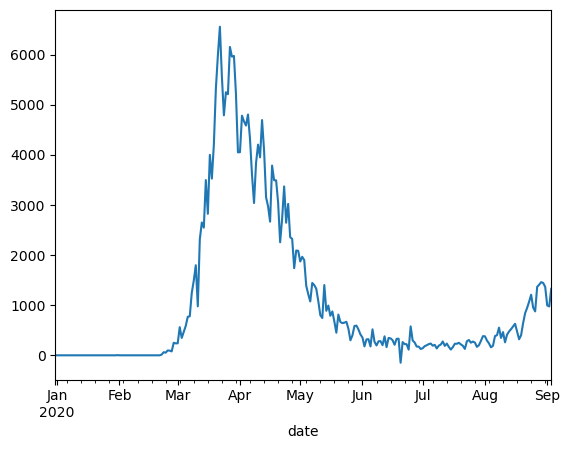

In [71]:
result_df.new_cases.plot()

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.


### `inplace` in Pandas
By default, the Pandas replace method returns a new dataframe. (This is the default behavior because by default, the inplace parameter is set to inplace = False .) If you set inplace = True , the method will return nothing, and will instead directly modify the dataframe that's being operated on

In [68]:
result_df.set_index('date',inplace=True)

In [69]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403


<AxesSubplot:xlabel='date'>

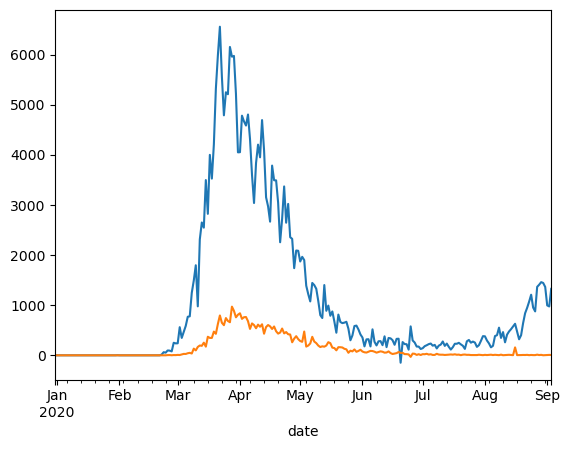

In [75]:
result_df.new_cases.plot()
result_df.new_deaths.plot()
# result_df.total_tests.plot()
# result_df.total_deaths.plot()

<AxesSubplot:xlabel='date'>

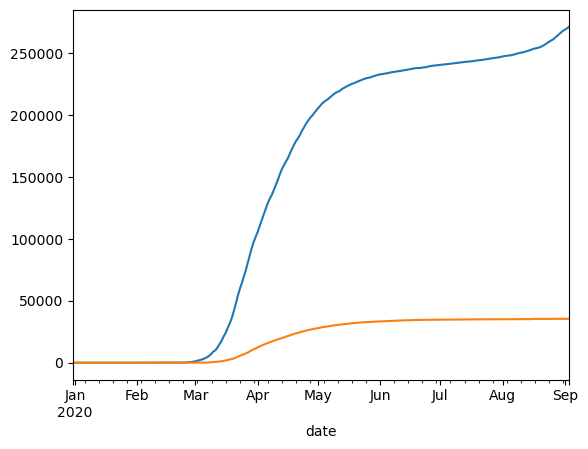

In [76]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

In [78]:
result_df



,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403


## Plotting Month wise data 

<AxesSubplot:xlabel='month'>

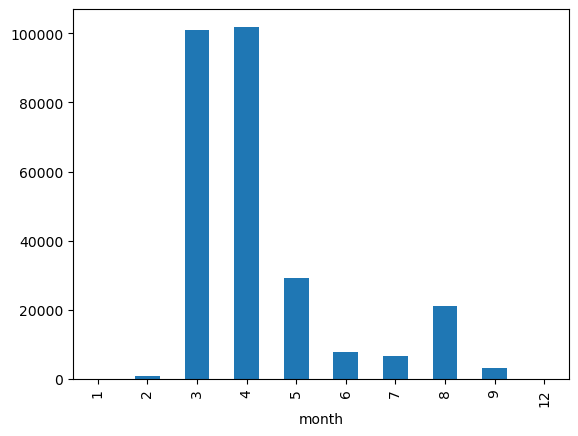

In [92]:
covid_df_month.sum().new_cases.plot(kind='bar')

In [94]:
pip install jovian

     -------------------------------------- 68.6/68.6 kB 621.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6480 sha256=e549cce2255f34ba9a387b73b1c84245ea4662670f16f0b1b049b489ad23a61f
  Stored in directory: c:\users\niks1\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid
Note: you may need to restart the kernel to use updated packages.


In [95]:
import jovian

<IPython.core.display.Javascript object>

In [97]:
jovian.commit(filename='python-pandas-data-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:[jovian] Committed successfully! https://jovian.ai/nikhil956839/python-pandas-data-analysis-ac5d9


'https://jovian.ai/nikhil956839/python-pandas-data-analysis-ac5d9'